# Figures and analysis

This notebook contains scripts to reproduce the figures and analytical results of the manuscript. Full details of the plotting functions are typically contained in XXX.py. Figures are saved in PDF format in the figures/ folder.

# Contents

Libraries

Figures and data analysis
Figure 1. 
Figure 2. 
Figure S1. 
Figure S2. 
Analysis. Comparison of 

# Libraries

In [1]:
# Full library list and version numbers

print('Figures below were produced using the following packages:')

import os
import sys
print('python ==', sys.version)

import numpy as np
print('numpy ==', np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy ==', sp.__version__)

import pandas as pd
print('pandas ==', pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib ==', matplotlib.__version__)

import seaborn as sns 
print('seaborn ==', sns.__version__)

import warnings

from importlib import reload

import Plot


Figures below were produced using the following packages:
python == 3.7.6 (default, Dec 27 2019, 09:51:07) 
[Clang 11.0.0 (clang-1100.0.33.16)]
numpy == 1.21.6
scipy == 1.7.3
pandas == 1.3.5
matplotlib == 3.5.1
seaborn == 0.11.2


## Figures and data analysis

## Figure 1. Sample Cervix Images

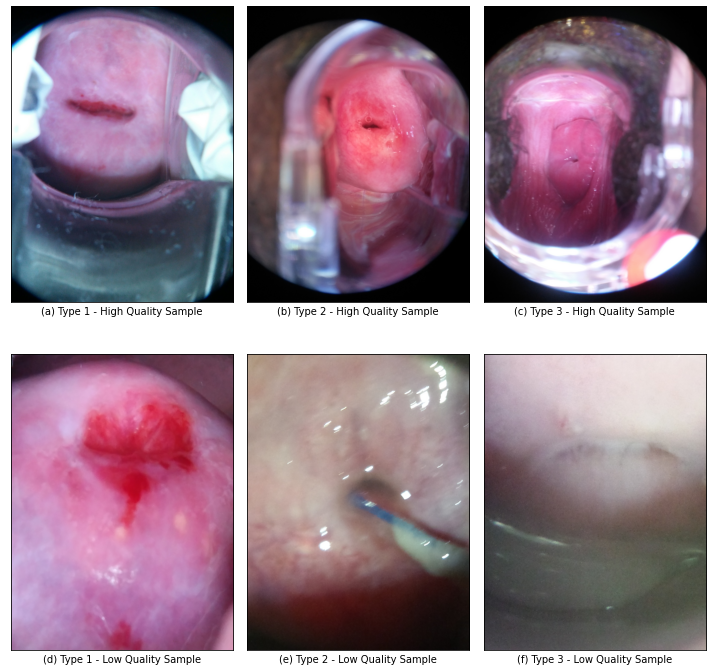

In [9]:
import matplotlib.image as mpimg

font = {'size': 10}
plt.rc('font', **font)

f, ax = plt.subplots(2, 3, figsize=(10, 10))
sample_img_folder = "./data/sample_img/"
img_list = [ 'Type_1_clear.jpeg',
             'Type_2_clear.jpeg',
             'Type_3_clear.jpeg',
             'Type_1_unclear.jpeg',
             'Type_2_unclear.jpeg',
             'Type_3_unclear.jpeg']

ax[0, 0].imshow(mpimg.imread(sample_img_folder + img_list[0]))
ax[0, 1].imshow(mpimg.imread(sample_img_folder + img_list[1]))
ax[0, 2].imshow(mpimg.imread(sample_img_folder + img_list[2]))
ax[1, 0].imshow(mpimg.imread(sample_img_folder + img_list[3]))
ax[1, 1].imshow(mpimg.imread(sample_img_folder + img_list[4]))
ax[1, 2].imshow(mpimg.imread(sample_img_folder + img_list[5]))
ax[0, 0].set_xlabel('(a) Type 1 - High Quality Sample')
ax[0, 1].set_xlabel('(b) Type 2 - High Quality Sample')
ax[0, 2].set_xlabel('(c) Type 3 - High Quality Sample')
ax[1, 0].set_xlabel('(d) Type 1 - Low Quality Sample')
ax[1, 1].set_xlabel('(e) Type 2 - Low Quality Sample')
ax[1, 2].set_xlabel('(f) Type 3 - Low Quality Sample')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
# ax[0, 1].set_title("Sample Images of Different Cervix Types")
f.tight_layout()
plt.savefig("./figures/Figure1_Sample_Image.pdf", dpi = 150)
plt.show()

## Figure 2. Confusion Matrix of Proposed ViT-LoRA Cervix Classifier

<Figure size 720x720 with 0 Axes>

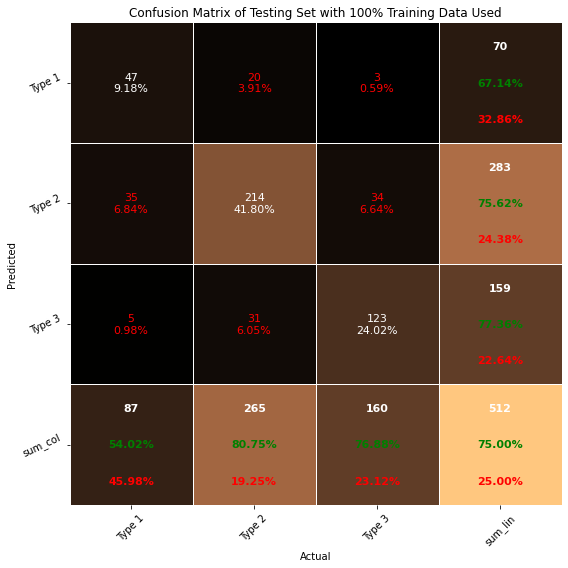

In [3]:
from pretty_confusion_matrix import pp_matrix
plt.figure(figsize=(10, 10))
confusion_matrix = pd.read_csv("./data/Confusion_Matrix.csv", index_col=0)
Plot.pp_matrix(confusion_matrix, cmap = "copper")
plt.title("Confusion Matrix of Testing Set with 100% Training Data Used")
plt.savefig("./figures/Figure2_Confusion_Matrix.pdf", dpi = 150)

## Figure 3. Model Performance Results

Highest training accuracy:
Ours : 98.9 %
ResNet-50 : 94.5 %
ResNet-101 : 96.0 %
ResNeXt-50 : 95.6 %
ResNeXt-101 : 94.9 %
Lowest training loss:
Ours : 1.1
ResNet-50 : 2.5
ResNet-101 : 3.1
ResNeXt-50 : 2.6
ResNeXt-101 : 2.6


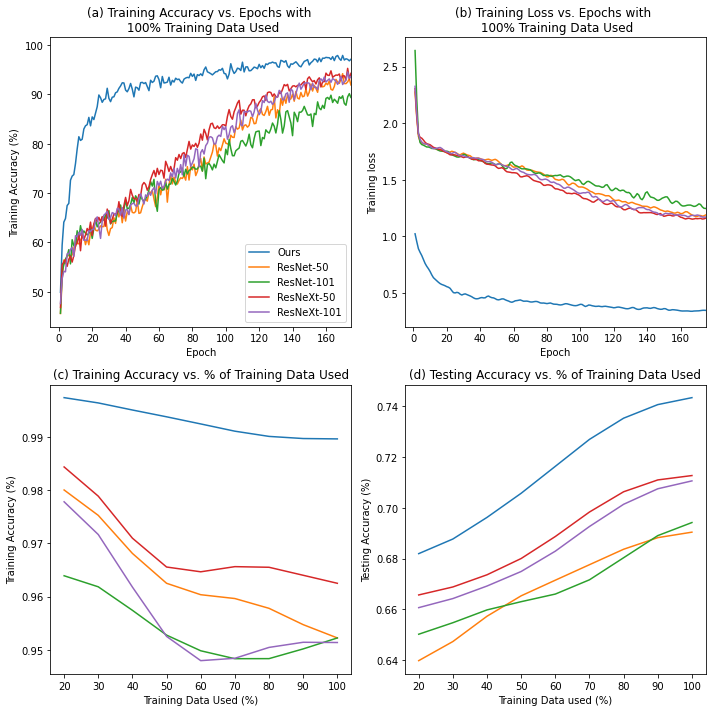

In [4]:
import matplotlib.gridspec as gridspec
from scipy.ndimage.filters import gaussian_filter1d

def training_epoch(df, model_name, label, smoothness, axis_i):
    ysmoothed = gaussian_filter1d(df[model_name], sigma = smoothness)
    axis_i.plot(df['Epoch'], ysmoothed, linestyle = '-', label = label)
    
def training_data_size(df, model_name, label, smoothness, axis_i):
    ysmoothed = gaussian_filter1d(df[model_name], sigma = smoothness)
    axis_i.plot(df['data size'], ysmoothed, linestyle = '-', label = label)

percentage_list = ["20.0%", "30.0%", "40.0%", "50.0%", "60.0%", "70.0%", "80.0%", "90.0%", "100%"]
Model_list = ['Ours', 'ResNet-50', 'ResNet-101', 'ResNeXt-50', 'ResNeXt-101']

fig = plt.figure(tight_layout=True, figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

# subfigure_1
ax = fig.add_subplot(gs[0, 0])
percentage = percentage_list[-1]
smoothness = 0.4
accuracy_epoch = pd.read_csv(f"./data/accuracy_epoch_{percentage}.csv")
accuracy_epoch *= 100
accuracy_epoch['Epoch'] /= 100
ax.set_xlim([-5, 175])
ax.set_xlabel('Epoch')
ax.set_ylabel('Training Accuracy (%)')
ax.set_title('(a) Training Accuracy vs. Epochs with \n 100% Training Data Used')
print('Highest training accuracy:')
for model in Model_list:
    training_epoch(accuracy_epoch, model + '_Train', model, smoothness, ax)
    print(model, ':', round(max(accuracy_epoch[model+'_Train']), 1), '%')
ax.legend()

# subfigure_2
ax = fig.add_subplot(gs[0, 1])
smoothness = 1
loss_epoch = pd.read_csv(f"./data/train_loss_epoch_{percentage}.csv")
ax.set_xlim([-5, 175])
ax.set_xlabel('Epoch')
ax.set_ylabel('Training loss')
ax.set_title('(b) Training Loss vs. Epochs with \n 100% Training Data Used')
print('Lowest training loss:')
for model in Model_list:
    training_epoch(loss_epoch, model, model, smoothness, ax)
    print(model, ':', round(max(loss_epoch[model]), 1))
# ax.legend()


# subfigure_3
ax = fig.add_subplot(gs[1, 0])
smoothness = 1.5
acc_data_size = pd.read_csv("./data/train_accuracy_data_size.csv")
Model_list = ['Ours', 'ResNet-50', 'ResNet-101', 'ResNeXt-50', 'ResNeXt-101']
for model in Model_list:
    training_data_size(acc_data_size, model, model, smoothness, ax)
ax.set_xlabel('Training Data Used (%)')
ax.set_ylabel('Training Accuracy (%)')
ax.set_title('(c) Training Accuracy vs. % of Training Data Used')
# ax.legend()

# subfigure_4
ax = fig.add_subplot(gs[1, 1])
smoothness = 1.5
acc_data_size = pd.read_csv("./data/test_accuracy_data_size.csv")
Model_list = ['Ours', 'ResNet-50', 'ResNet-101', 'ResNeXt-50', 'ResNeXt-101']
for model in Model_list:
    training_data_size(acc_data_size, model, model, smoothness, ax)
ax.set_xlabel('Training Data used (%)')
ax.set_ylabel('Testing Accuracy (%)')
ax.set_title('(d) Testing Accuracy vs. % of Training Data Used')
# ax.legend()

plt.savefig("./figures/Figure4_Accuracy_Loss_Epochs.pdf", dpi = 150)

# Data analysis Model performance

Precision Recall Curve?
Calibration plot？

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, confusion_matrix

percentage_list = ["20.0%", "30.0%", "40.0%", "50.0%", "60.0%", "70.0%", "80.0%", "90.0%", "100%"]
model_list = ["lora_large_clip", "resnet50", "resnet101", "resnext50", "resnext101"]

df_performance_metric = pd.DataFrame(columns=["% of Training Data Used", "Model", 
                                              "Precision_macro", "Precision_micro", "Precision_weighted", 
                                              "Recall_macro", "Recall_micro", "Recall_weighted",
                                              "F1_score_macro", "F1_score_micro", "F1_score_weighted", 
#                                               "Specialty_",
                                              "MCC", 
#                                               "AUROC_macro", "AUROC_micro", "AUROC_weighted"
                                             ])

#df.loc[len(df)] = list
for percentage in percentage_list:
    for model in model_list:
        df_row = [percentage, model]
        df_predict = pd.read_csv(f"./result_eval/mobileODT{percentage}_{model}_predictions.csv")
        y_true = df_predict["True Label"]
        y_pred = df_predict["Predicted Label"]
        
        # Precison
        precision_macro = precision_score(y_true, y_pred, average = 'macro')
        df_row.append(precision_macro)
        precision_micro = precision_score(y_true, y_pred, average = 'micro')
        df_row.append(precision_micro)
        precision_weighted = precision_score(y_true, y_pred, average = 'weighted')
        df_row.append(precision_weighted)
        
        # Recall
        recall_macro = recall_score(y_true, y_pred, average = 'macro')
        df_row.append(recall_macro)
        recall_micro = recall_score(y_true, y_pred, average = 'micro')
        df_row.append(recall_micro)
        recall_weighted = recall_score(y_true, y_pred, average = 'weighted')
        df_row.append(recall_weighted)
        
        # F1-score
        f1_macro = f1_score(y_true, y_pred, average = 'macro')
        df_row.append(f1_macro)
        f1_micro = f1_score(y_true, y_pred, average = 'micro')
        df_row.append(f1_micro)
        f1_weighted = f1_score(y_true, y_pred, average = 'weighted')
        df_row.append(f1_weighted)    
        
        # MCC
        MCC = matthews_corrcoef(y_true, y_pred)
        df_row.append(MCC)
        
        # AUROC
#         AUROC_macro = roc_auc_score(y_true, y_pred, average = 'macro')
#         df_row.append(AUROC_macro)
#         AUROC_micro = roc_auc_score(y_true, y_pred, average = 'micro')
#         df_row.append(AUROC_micro)
#         AUROC_weighted = roc_auc_score(y_true, y_pred, average = 'weighted')
#         df_row.append(AUROC_weighted)    

        df_performance_metric.loc[len(df_performance_metric)] = df_row
        
main_body_col = ["% of Training Data Used", "Model", "Precision_micro", "Recall_micro", "F1_score_micro", "MCC"]
main_body_percent = "100%"
df_performance_metric_main_body = df_performance_metric[main_body_col].copy()
# df_performance_metric_main_body = df_performance_metric_main_body.loc[df_performance_metric_main_body["% of Training Data Used"] == main_body_percent]
df_performance_metric_main_body

main_body_col = ["% of Training Data Used", "Model", "Precision_macro", "Recall_macro", "F1_score_macro", "MCC"]
main_body_percent = "100%"
df_performance_metric_main_body = df_performance_metric[main_body_col].copy()
# df_performance_metric_main_body = df_performance_metric_main_body.loc[df_performance_metric_main_body["% of Training Data Used"] == main_body_percent]
df_performance_metric_main_body

main_body_col = ["% of Training Data Used", "Model", "Precision_weighted", "Recall_weighted", "F1_score_weighted", "MCC"]
main_body_percent = "100%"
df_performance_metric_main_body = df_performance_metric[main_body_col].copy()
# df_performance_metric_main_body = df_performance_metric_main_body.loc[df_performance_metric_main_body["% of Training Data Used"] == main_body_percent]
df_performance_metric_main_body

,% of Training Data Used,Model,Precision_weighted,Recall_weighted,F1_score_weighted,MCC
0,20.0%,lora_large_clip,0.664758,0.667969,0.664190,0.439037
1,20.0%,resnet50,0.617449,0.625000,0.617729,0.363159
2,20.0%,resnet101,0.622985,0.632812,0.620254,0.373768
3,20.0%,resnext50,0.655551,0.654297,0.631670,0.403629
4,20.0%,resnext101,0.646010,0.654297,0.647242,0.415040
5,30.0%,lora_large_clip,0.687723,0.693359,0.686055,0.478373
6,30.0%,resnet50,0.642202,0.644531,0.642515,0.405320
7,30.0%,resnet101,0.665290,0.669922,0.660841,0.435104
8,30.0%,resnext50,0.682355,0.679688,0.658634,0.445047
9,30.0%,resnext101,0.654190,0.656250,0.638176,0.403717


In [26]:
df_performance_metric

df_predict = pd.read_csv(f"./result_eval/mobileODT20.0%_lora_large_clip_predictions.csv")
df_predict

recall_score(df_predict["True Label"], df_predict["Predicted Label"], average = 'micro') == precision_score(df_predict["True Label"], df_predict["Predicted Label"], average = 'micro')

True

# Supplemental Figure 1. Confusion Matrix, all testing matrix with % of training data used

# Supplemental Figure 1. Training Accuracy vs. %s of Training Data Used

Highest training accuracy, 20.0%:
Ours : 100.0 %
ResNet-50 : 98.8 %
ResNet-101 : 95.9 %
ResNeXt-50 : 99.1 %
ResNeXt-101 : 98.8 %
Highest training accuracy, 30.0%:
Ours : 99.5 %
ResNet-50 : 97.5 %
ResNet-101 : 97.7 %
ResNeXt-50 : 98.6 %
ResNeXt-101 : 97.3 %
Highest training accuracy, 40.0%:
Ours : 99.4 %
ResNet-50 : 97.8 %
ResNet-101 : 96.1 %
ResNeXt-50 : 97.1 %
ResNeXt-101 : 96.8 %
Highest training accuracy, 50.0%:
Ours : 99.5 %
ResNet-50 : 93.4 %
ResNet-101 : 92.8 %
ResNeXt-50 : 93.9 %
ResNeXt-101 : 94.2 %
Highest training accuracy, 60.0%:
Ours : 99.3 %
ResNet-50 : 97.3 %
ResNet-101 : 97.1 %
ResNeXt-50 : 97.5 %
ResNeXt-101 : 93.0 %
Highest training accuracy, 70.0%:
Ours : 99.1 %
ResNet-50 : 96.1 %
ResNet-101 : 93.5 %
ResNeXt-50 : 96.9 %
ResNeXt-101 : 95.8 %
Highest training accuracy, 80.0%:
Ours : 98.7 %
ResNet-50 : 95.8 %
ResNet-101 : 94.9 %
ResNeXt-50 : 96.3 %
ResNeXt-101 : 95.0 %
Highest training accuracy, 90.0%:
Ours : 99.1 %
ResNet-50 : 95.9 %
ResNet-101 : 94.4 %
ResNeXt-50 : 97.

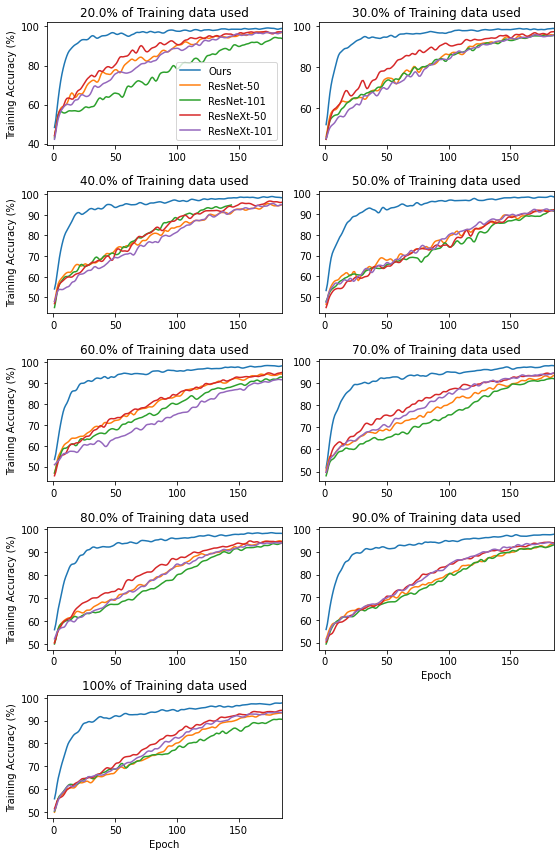

In [5]:
f, ax = plt.subplots(5, 2, figsize=(8,12))

axis_list = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1], [3,0], [3,1], [4,0]]

for i in range(len(percentage_list)):
    percentage = percentage_list[i]
    test_acc_epoch = pd.read_csv(f"./data/accuracy_epoch_{percentage}.csv")
    test_acc_epoch *= 100
    test_acc_epoch['Epoch'] /= 100
    axis_current = ax[axis_list[i][0], axis_list[i][1]]
    axis_current.set_xlim([-5, 185])
    if axis_list[i][0] == 4:
        axis_current.set_xlabel('Epoch')
    if axis_list[i][0] == 3 and axis_list[i][1] == 1:
        axis_current.set_xlabel('Epoch')
    if axis_list[i][1] == 0:
        axis_current.set_ylabel('Training Accuracy (%)')
    axis_current.set_title('%s of Training data used' %percentage)
    print('Highest training accuracy, %s:'%percentage)
    for model in Model_list:
        training_epoch(test_acc_epoch, model + '_Train', model, smoothness, axis_current)
        print(model, ':', round(max(test_acc_epoch[model+'_Train']), 1), '%')
plt.tight_layout()
ax[0,0].legend()
ax[-1, -1].axis('off')

plt.savefig("./figures/SuppFig1_Train_Accuracy_Epochs.pdf", dpi = 150)

# Supplemental Figure 2. Training Loss vs. % of Training Data Used

Lowest training loss, 20.0%:
Ours : 0.3
ResNet-50 : 1.1
ResNet-101 : 1.1
ResNeXt-50 : 1.1
ResNeXt-101 : 1.1
Lowest training loss, 30.0%:
Ours : 0.3
ResNet-50 : 1.1
ResNet-101 : 1.1
ResNeXt-50 : 1.1
ResNeXt-101 : 1.1
Lowest training loss, 40.0%:
Ours : 0.3
ResNet-50 : 1.1
ResNet-101 : 1.1
ResNeXt-50 : 1.1
ResNeXt-101 : 1.1
Lowest training loss, 50.0%:
Ours : 0.3
ResNet-50 : 1.2
ResNet-101 : 1.2
ResNeXt-50 : 1.2
ResNeXt-101 : 1.2
Lowest training loss, 60.0%:
Ours : 0.3
ResNet-50 : 1.1
ResNet-101 : 1.1
ResNeXt-50 : 1.1
ResNeXt-101 : 1.2
Lowest training loss, 70.0%:
Ours : 0.3
ResNet-50 : 1.1
ResNet-101 : 1.2
ResNeXt-50 : 1.1
ResNeXt-101 : 1.1
Lowest training loss, 80.0%:
Ours : 0.3
ResNet-50 : 1.1
ResNet-101 : 1.1
ResNeXt-50 : 1.1
ResNeXt-101 : 1.1
Lowest training loss, 90.0%:
Ours : 0.3
ResNet-50 : 1.1
ResNet-101 : 1.2
ResNeXt-50 : 1.1
ResNeXt-101 : 1.1
Lowest training loss, 100%:
Ours : 0.3
ResNet-50 : 1.2
ResNet-101 : 1.1
ResNeXt-50 : 1.1
ResNeXt-101 : 1.1


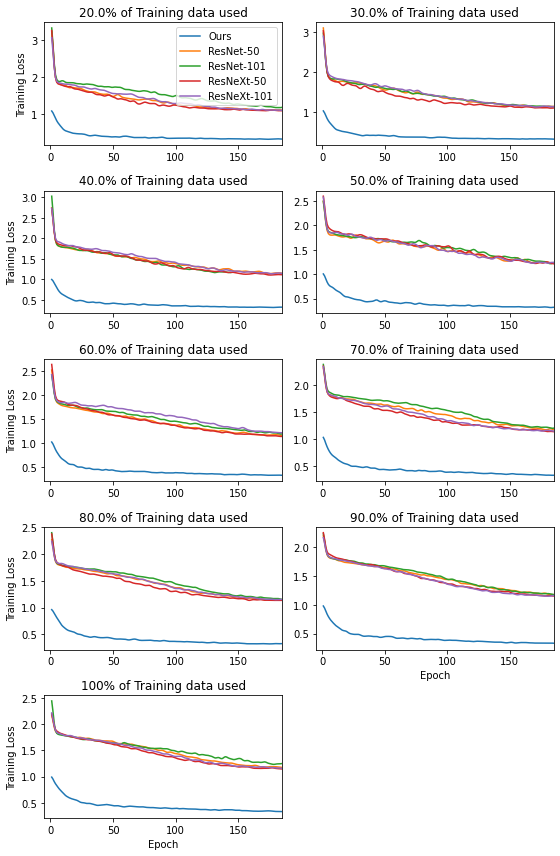

In [6]:
f, ax = plt.subplots(5, 2, figsize=(8,12))

for i in range(len(percentage_list)):
    percentage = percentage_list[i]
    test_acc_epoch = pd.read_csv(f"./data/train_loss_epoch_{percentage}.csv")
    axis_current = ax[axis_list[i][0], axis_list[i][1]]
    axis_current.set_xlim([-5, 185])
    if axis_list[i][0] == 4:
        axis_current.set_xlabel('Epoch')
    if axis_list[i][0] == 3 and axis_list[i][1] == 1:
        axis_current.set_xlabel('Epoch')
    if axis_list[i][1] == 0:
        axis_current.set_ylabel('Training Loss')
    axis_current.set_title('%s of Training data used' %percentage)
    print('Lowest training loss, %s:'%percentage)
    for model in Model_list:
        training_epoch(test_acc_epoch, model , model, smoothness, axis_current)
        print(model, ':', round(min(test_acc_epoch[model]), 1))
plt.tight_layout()
ax[0,0].legend()
ax[-1, -1].axis('off')

plt.savefig("./figures/SuppFig2_Train_Loss_Epochs.pdf", dpi = 150)

# Supplemental Figure 3. Testing Accuracy vs. % of Training Data Used

Highest testing accuracy, 20.0%:
Ours : 66.8 %
ResNet-50 : 62.5 %
ResNet-101 : 63.3 %
ResNeXt-50 : 65.4 %
ResNeXt-101 : 65.4 %
Highest testing accuracy, 30.0%:
Ours : 69.1 %
ResNet-50 : 64.3 %
ResNet-101 : 67.0 %
ResNeXt-50 : 68.0 %
ResNeXt-101 : 65.8 %
Highest testing accuracy, 40.0%:
Ours : 69.9 %
ResNet-50 : 67.4 %
ResNet-101 : 65.8 %
ResNeXt-50 : 66.8 %
ResNeXt-101 : 68.8 %
Highest testing accuracy, 50.0%:
Ours : 70.1 %
ResNet-50 : 66.4 %
ResNet-101 : 66.8 %
ResNeXt-50 : 67.6 %
ResNeXt-101 : 65.6 %
Highest testing accuracy, 60.0%:
Ours : 70.9 %
ResNet-50 : 66.8 %
ResNet-101 : 66.2 %
ResNeXt-50 : 68.4 %
ResNeXt-101 : 67.8 %
Highest testing accuracy, 70.0%:
Ours : 73.8 %
ResNet-50 : 67.8 %
ResNet-101 : 65.8 %
ResNeXt-50 : 70.5 %
ResNeXt-101 : 70.5 %
Highest testing accuracy, 80.0%:
Ours : 74.0 %
ResNet-50 : 68.4 %
ResNet-101 : 68.4 %
ResNeXt-50 : 70.9 %
ResNeXt-101 : 69.7 %
Highest testing accuracy, 90.0%:
Ours : 73.6 %
ResNet-50 : 69.7 %
ResNet-101 : 69.7 %
ResNeXt-50 : 71.9 %
ResNe

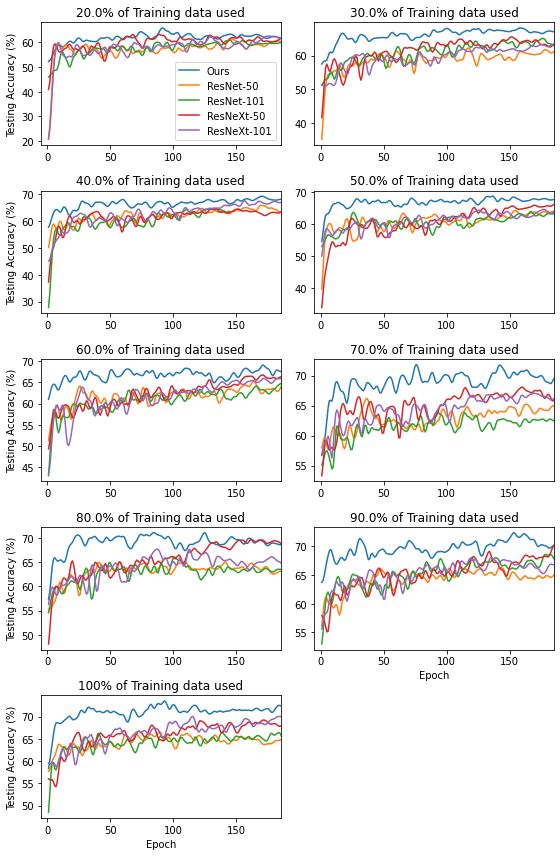

In [7]:
f, ax = plt.subplots(5, 2, figsize=(8,12))

for i in range(len(percentage_list)):
    percentage = percentage_list[i]
    test_acc_epoch = pd.read_csv(f"./data/accuracy_epoch_{percentage}.csv")
    test_acc_epoch *= 100
    test_acc_epoch['Epoch'] /= 100
    axis_current = ax[axis_list[i][0], axis_list[i][1]]
    axis_current.set_xlim([-5, 185])
    if axis_list[i][0] == 4:
        axis_current.set_xlabel('Epoch')
    if axis_list[i][0] == 3 and axis_list[i][1] == 1:
        axis_current.set_xlabel('Epoch')
    if axis_list[i][1] == 0:
        axis_current.set_ylabel('Testing Accuracy (%)')
    axis_current.set_title('%s of Training data used' %percentage)
    print('Highest testing accuracy, %s:'%percentage)
    for model in Model_list:
        training_epoch(test_acc_epoch, model + '_Test', model, smoothness, axis_current)
        print(model, ':', round(max(test_acc_epoch[model+'_Test']), 1), '%')
plt.tight_layout()
ax[0,0].legend()
ax[-1, -1].axis('off')

plt.savefig("./figures/SuppFig3_Test_Accuracy_Epochs.pdf", dpi = 150)